In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("scrapeme_products_full (1).csv")

# Show first 5 rows
df.head()

,Name,Price,Description,Category,SKU,Tags,Stock_Status
0,Bulbasaur,£63.00,Bulbasaur can be seen napping in bright sunlig...,"Pokemon, Seed",4391,"bulbasaur, Overgrow, Seed",45 in stock
1,Ivysaur,£87.00,There is a bud on this Pokémon’s back. To supp...,"Pokemon, Seed",7227,"ivysaur, Overgrow, Seed",142 in stock
2,Venusaur,£105.00,There is a large flower on Venusaur’s back. Th...,"Pokemon, Seed",7036,"Overgrow, Seed, venusaur",30 in stock
3,Charmander,£48.00,The flame that burns at the tip of its tail is...,"Lizard, Pokemon",9086,"Blaze, charmander, Lizard",206 in stock
4,Charmeleon,£165.00,Charmeleon mercilessly destroys its foes using...,"Flame, Pokemon",6565,"Blaze, charmeleon, Flame",284 in stock


In [2]:
# Basic info
print("Shape of the dataset:", df.shape)
print("\nColumns and data types:")
print(df.dtypes)

Shape of the dataset: (755, 7)

Columns and data types:
Name            object
Price           object
Description     object
Category        object
SKU              int64
Tags            object
Stock_Status    object
dtype: object


In [3]:
# Missing values
print("Missing values in each column:")
print(df.isna().sum())

Missing values in each column:
Name            0
Price           0
Description     0
Category        0
SKU             0
Tags            0
Stock_Status    0
dtype: int64


In [4]:
# Summary for numerical data
# Price is currently string (with £)
df['Price_clean'] = df['Price'].str.replace('£','').str.replace(',','').astype(float)

print(df['Price_clean'].describe())

count    755.000000
mean     110.948344
std       51.702359
min       25.000000
25%       66.000000
50%      111.000000
75%      157.000000
max      200.000000
Name: Price_clean, dtype: float64


In [5]:
# Using loc and iloc
# Select first 5 rows and all columns using iloc
print(df.iloc[0:5, :])

# Select 'Name' and 'Price' columns using loc for first 5 rows
print(df.loc[0:4, ['Name', 'Price']])

         Name    Price                                        Description  \
0   Bulbasaur   £63.00  Bulbasaur can be seen napping in bright sunlig...   
1     Ivysaur   £87.00  There is a bud on this Pokémon’s back. To supp...   
2    Venusaur  £105.00  There is a large flower on Venusaur’s back. Th...   
3  Charmander   £48.00  The flame that burns at the tip of its tail is...   
4  Charmeleon  £165.00  Charmeleon mercilessly destroys its foes using...   

          Category   SKU                       Tags  Stock_Status  Price_clean  
0    Pokemon, Seed  4391  bulbasaur, Overgrow, Seed   45 in stock         63.0  
1    Pokemon, Seed  7227    ivysaur, Overgrow, Seed  142 in stock         87.0  
2    Pokemon, Seed  7036   Overgrow, Seed, venusaur   30 in stock        105.0  
3  Lizard, Pokemon  9086  Blaze, charmander, Lizard  206 in stock         48.0  
4   Flame, Pokemon  6565   Blaze, charmeleon, Flame  284 in stock        165.0  
         Name    Price
0   Bulbasaur   £63.00
1    

In [6]:
df.describe()

,SKU,Price_clean
count,755.000000,755.000000
mean,5450.229139,110.948344
std,2647.741068,51.702359
min,1004.000000,25.000000
25%,3163.500000,66.000000
50%,5333.000000,111.000000
75%,7768.000000,157.000000
max,9991.000000,200.000000


In [7]:
# Categories analysis
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Dragon, Pokemon          8
Mouse, Pokemon           6
Flame, Pokemon           5
Fox, Pokemon             5
Balloon, Pokemon         5
                        ..
Blast Turtle, Pokemon    1
Pokemon, Synthetic       1
Pokemon, Sea Cucumber    1
Pokemon, Sand Castle     1
Pokemon, Sand Heap       1
Name: count, Length: 554, dtype: int64


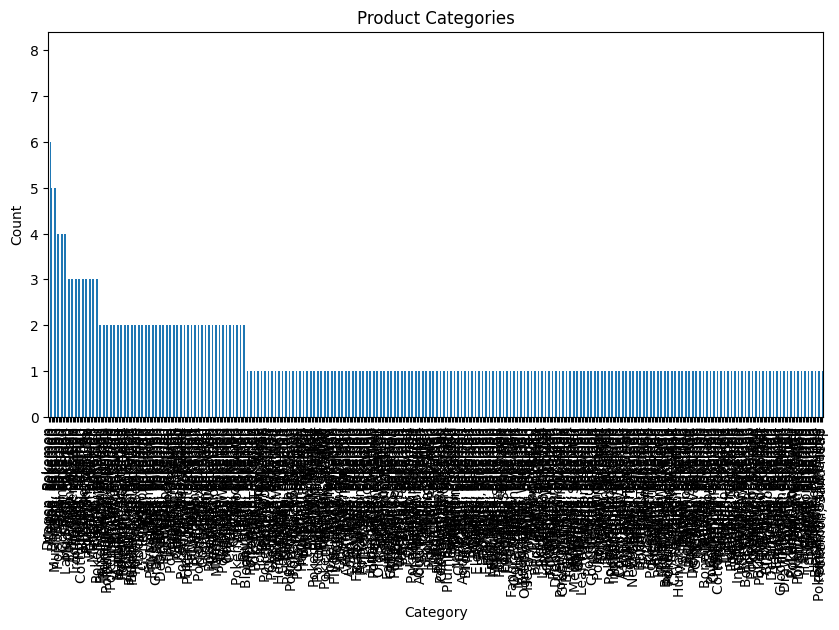

In [8]:
# Plot top categories
category_counts.plot(kind='bar', figsize=(10,5), title='Product Categories')
plt.ylabel('Count')
plt.show()

In [9]:
# Stock status
stock_counts = df['Stock_Status'].value_counts()
print(stock_counts)

Stock_Status
30 in stock     8
136 in stock    8
195 in stock    7
152 in stock    7
245 in stock    7
               ..
72 in stock     1
20 in stock     1
212 in stock    1
19 in stock     1
121 in stock    1
Name: count, Length: 261, dtype: int64


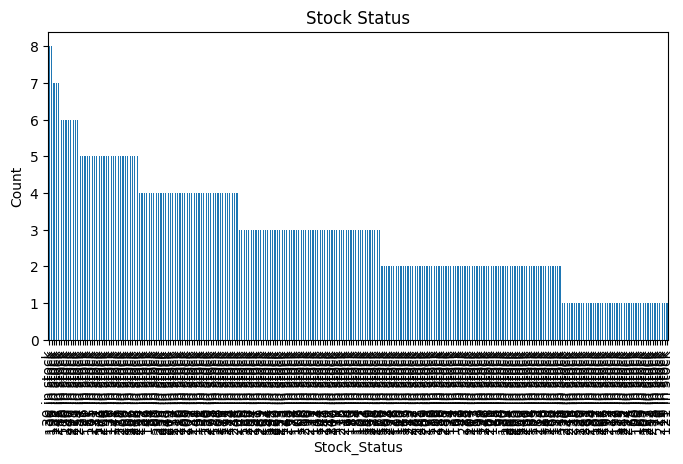

In [10]:
# Bar plot
stock_counts.plot(kind='bar', figsize=(8,4), title='Stock Status')
plt.ylabel('Count')
plt.show()

In [11]:
#  Tags frequency (split multiple tags per product)
all_tags = df['Tags'].dropna().str.split(',').explode().str.strip()
tag_counts = all_tags.value_counts()
print(tag_counts.head(10))  # top 10 tags

Tags
Levitate       31
Keen Eye       29
Chlorophyll    27
Blaze          21
Intimidate     21
Swarm          20
Torrent        20
Overgrow       20
Swift Swim     19
Rock Head      18
Name: count, dtype: int64


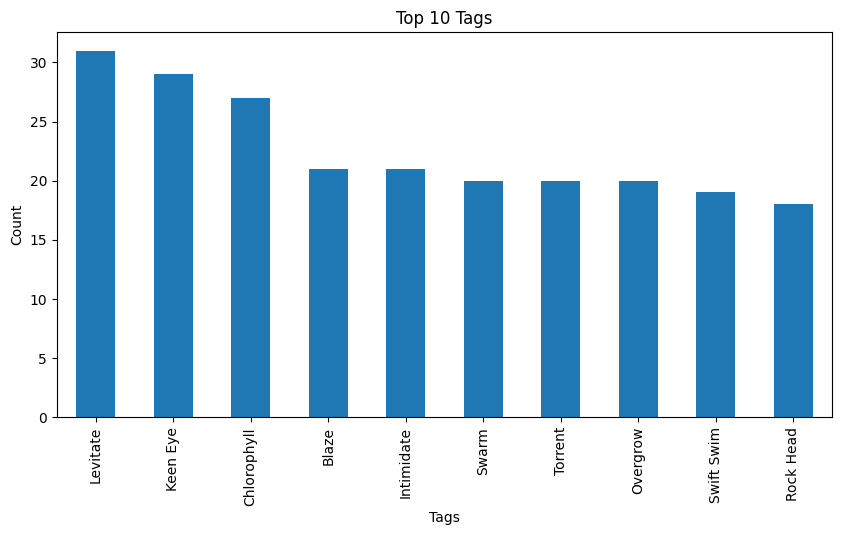

In [12]:
# Plot top 10 tags
tag_counts.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Tags')
plt.ylabel('Count')
plt.show()

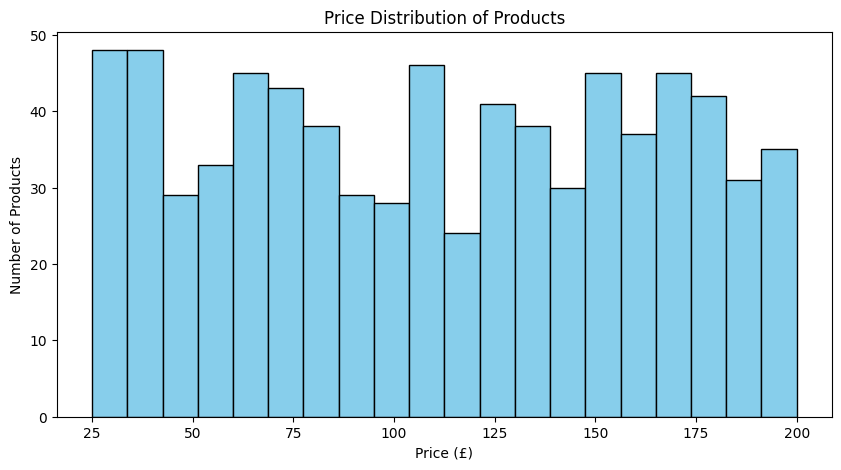

In [13]:
# Price distribution
plt.figure(figsize=(10,5))
plt.hist(df['Price_clean'], bins=20, color='skyblue', edgecolor='black')
plt.title("Price Distribution of Products")
plt.xlabel("Price (£)")
plt.ylabel("Number of Products")
plt.show()

In [14]:
# Top 10 most expensive products
top10 = df.sort_values(by='Price_clean', ascending=False).head(10)
print(top10[['Name', 'Price', 'Category', 'Stock_Status']])

          Name    Price              Category  Stock_Status
322    Vibrava  £200.00    Pokemon, Vibration  218 in stock
452  Magmortar  £200.00        Blast, Pokemon  149 in stock
50     Persian  £200.00   Classy Cat, Pokemon  108 in stock
464       Uxie  £200.00    Knowledge, Pokemon  138 in stock
608   Zweilous  £199.00      Hostile, Pokemon   69 in stock
220   Skarmory  £199.00   Armor Bird, Pokemon  102 in stock
164   Spinarak  £199.00  Pokemon, String Spit  136 in stock
502  Tranquill  £199.00  Pokemon, Wild Pigeon  295 in stock
88    Cloyster  £199.00      Bivalve, Pokemon   39 in stock
94       Hypno  £198.00     Hypnosis, Pokemon  222 in stock


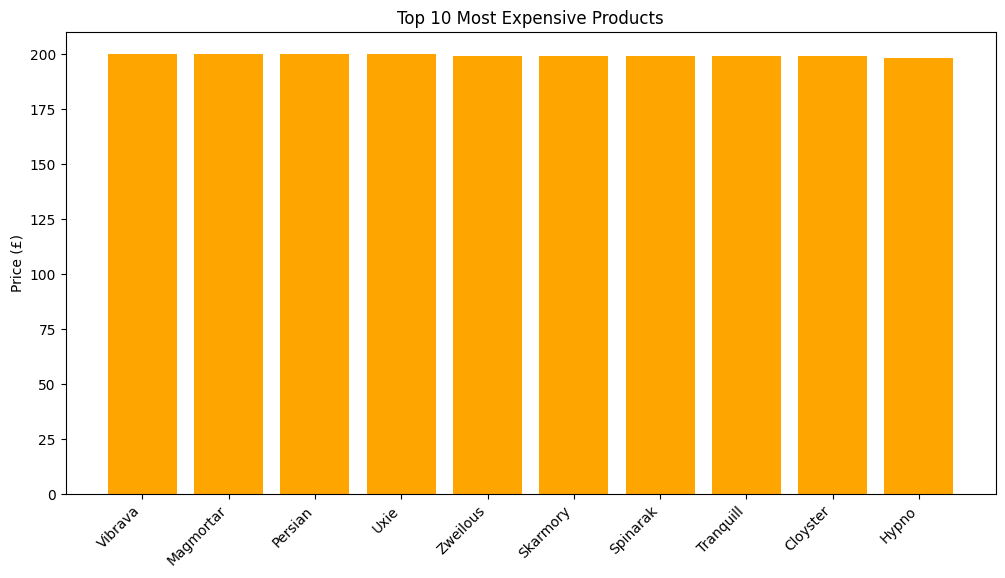

In [15]:
# Bar plot
plt.figure(figsize=(12,6))
plt.bar(top10['Name'], top10['Price_clean'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Expensive Products")
plt.ylabel("Price (£)")
plt.show()